# Анализ данных миллиардеров Forbes

## Описание проекта
Проект посвящен анализу данных о миллиардерах из рейтинга Forbes. Включает в себя первичную обработку данных, исследовательский анализ и построение прогнозной модели для определения чистого капитала на основе различных характеристик.

## Источник данных
- **Платформа:** Kaggle
- **Файл:** `forbes_billionaire.xlsx`
- **Период данных:** 2023 год (основано на лидере рейтинга - Бернар Арно)
- **Исходный размер:** 2655 записей

## Структура данных
- `rank` - Позиция в рейтинге Forbes
- `name` - Имя миллиардера
- `net_worth` - Состояние в миллиардах долларов
- `age` - Возраст
- `country/territory` - Страна/территория
- `source` - Источник состояния
- `industry` - Отрасль деятельности

## Основные этапы анализа
1. Загрузка и первичный осмотр данных
2. Очистка данных (удаление пропусков и дубликатов)
3. Разведочный анализ и визуализация
4. Предобработка данных для ML
5. Построение и оценка модели линейной регрессии
6. Анализ остатков и проверка допущений

## Ключевые выводы анализа

### 📊 По результатам исследования данных:
- **Общее количество:** Проанализированы данные о 2640 миллиардерах из рейтинга Forbes 2023 года
- **География:** США лидирует по количеству миллиардеров (739 человек)
- **Отрасли:** Наиболее представленные отрасли - Финансы и инвестиции, Технологии
- **Возраст:** Средний возраст миллиардеров составляет 65 лет
- **Капитал:** Состояния распределены крайне неравномерно (сильная правосторонняя асимметрия)

### 🤖 По результатам моделирования:
- **Качество модели:** Линейная регрессия показала высокое качество прогноза (R² = 0.995)
- **Главный фактор:** Позиция в рейтинге имеет наибольшее влияние на прогноз капитала
- **Ограничения:** Модель лучше работает для средних значений, возможны проблемы с экстремальными выбросами
- **Перспективы:** Полиномиальные признаки улучшили точность прогнозирования

### 💡 Практическая значимость:
Модель может использоваться для предварительной оценки потенциального положения в рейтинге на основе характеристик бизнеса и демографических данных. Наибольшую прогнозную силу имеют позиция в рейтинге и отраслевая принадлежность.

In [915]:
# Импорт необходимых библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [916]:
# Раздел: Импорт данных
# Загрузка данных из Excel-файла в DataFrame
df = pd.read_excel('forbes_billionaire.xlsx')

In [917]:
df.head()

,rank,name,net_worth (in billion $),age,country / territory,source,industry
0,1,Bernard Arnault & family,211.0,74.0,France,LVMH,Fashion & Retail
1,2,Elon Musk,180.0,51.0,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,114.0,59.0,United States,Amazon,Technology
3,4,Larry Ellison,107.0,78.0,United States,Oracle,Technology
4,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments


__rank__ - Место в рейтинге Forbes

__name__ - Имя

__net_worth (in billion $)__ - чистые доходы

__age__ - Возраст

__country / territory__ - страна/территория

__source__ - источник дохода

__industry__ - индустрия

Информация о признаках:

In [918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      2655 non-null   int64  
 1   name                      2655 non-null   object 
 2   net_worth (in billion $)  2655 non-null   float64
 3   age                       2588 non-null   float64
 4   country / territory       2655 non-null   object 
 5   source                    2655 non-null   object 
 6   industry                  2655 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 145.3+ KB


In [919]:
df.shape

(2655, 7)

In [920]:
# Раздел: Обработка и первичный анализ
# Проверка количества пропущенных значений в каждом столбце
df.isna().sum()

rank                         0
name                         0
net_worth (in billion $)     0
age                         67
country / territory          0
source                       0
industry                     0
dtype: int64

In [921]:
# Удаление строк с пропущенными значениями (в основном в столбце age)
df = df.dropna()

In [922]:
# Раздел: Описательные статистики
# Основные статистические характеристики числовых переменных
df.describe()

,rank,net_worth (in billion $),age
count,2588.000000,2588.000000,2588.000000
mean,1286.205564,4.660781,65.129444
std,743.610214,9.920845,13.255592
min,1.000000,1.000000,18.000000
25%,636.000000,1.500000,56.000000
50%,1292.000000,2.350000,65.000000
75%,1905.000000,4.300000,75.000000
max,2540.000000,211.000000,101.000000


Описательные статистики для категориальных переменных:

In [923]:
df.describe(include=[object])

,name,country / territory,source,industry
count,2588,2588,2588,2588
unique,2573,77,893,18
top,Scott Smith,United States,Real estate,Finance & Investments
freq,2,739,150,364


In [924]:
df[df['name'] == 'Scott Smith']

,rank,name,net_worth (in billion $),age,country / territory,source,industry
2545,2540,Scott Smith,1.0,73.0,United States,Cloud computing,Technology
2652,2540,Scott Smith,1.0,73.0,United States,Cloud computing,Technology


In [925]:
# Удаление полных дубликатов из DataFrame
df = df.drop_duplicates()

In [926]:
# Разделение данных на целевую переменную (y) и признаки (X)
y, X = df['net_worth (in billion $)'], df.drop('net_worth (in billion $)', axis=1)

In [927]:
# Кодирование категориальных переменных в числовые с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Определение категориальных переменных (все кроме возраста)
cat_vars = set(X.columns) - set(['Age'])
for var in cat_vars:
    X[var] = LabelEncoder().fit_transform(X[var])

X.head()

,rank,name,age,country / territory,source,industry
0,0,215,52,22,445,4
1,1,568,29,73,812,0
2,2,960,37,73,29,16
3,3,1238,56,73,585,16
4,4,2330,70,73,83,5


In [928]:
# Стандартизация числовых признаков для приведения к одинаковому масштабу
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns,
    index=X.index
)

X.head()

,rank,name,age,country / territory,source,industry
0,-4.920270,-1.442480,0.669226,-0.840585,-0.002269,-0.883916
1,-4.894377,-0.967221,-1.069301,1.149927,1.512282,-1.727614
2,-4.868484,-0.439456,-0.464595,1.149927,-1.719036,1.647176
3,-4.842591,-0.065173,0.971579,1.149927,0.575489,1.647176
4,-4.816697,1.405030,2.029813,1.149927,-1.496187,-0.672992


In [929]:
# Удаление выбросов - строк, где значения признаков превышают 3 стандартных отклонения
X = X[(np.abs(X) < 3)].dropna()
y = y[X.index]

In [931]:
# Раздел: Корреляционный анализ
# Анализ корреляции между признаками и целевой переменной
pd.concat([X, y], axis=1).corr()['net_worth (in billion $)'][:-1]

rank                  -0.996396
name                  -0.030703
age                    0.110922
country / territory    0.082760
source                 0.002298
industry              -0.037332
Name: net_worth (in billion $), dtype: float64

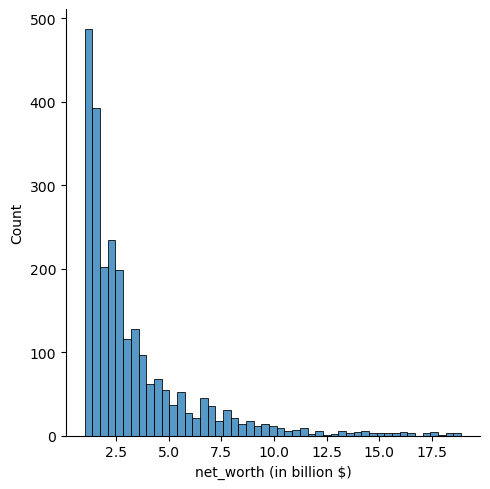

In [932]:
# Визуальная проверка распределения целевой переменной
sns.displot(y, kind='hist')

In [933]:
# Статистическая проверка нормальности распределения с помощью теста Шапиро-Уилка
st.shapiro(y)

ShapiroResult(statistic=0.7337225675582886, pvalue=0.0)

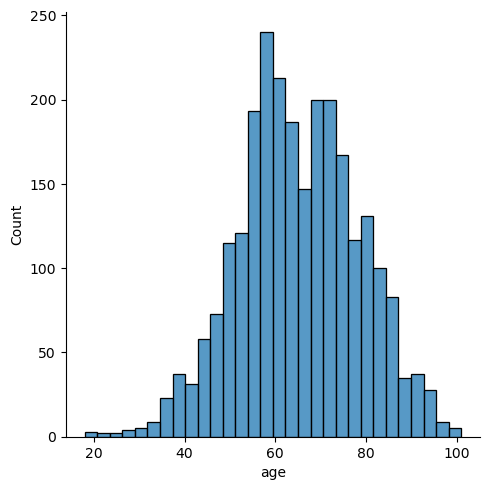

In [934]:
# Анализ распределения возраста миллиардеров
sns.displot(df['age'], kind='hist')

In [935]:
st.shapiro(df['age'])

ShapiroResult(statistic=0.9966691136360168, pvalue=1.931908991537057e-05)

# Линейная регрессия

In [936]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [937]:
# Создание и обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # Обучение модели линейной регрессии

LinearRegression()

In [938]:
# Оценка качества модели с помощью метрик MAE и R²
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lr.predict(X_test) # Запишу предсказания

mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(mae, r2)

0.11846781212923309 0.9955541816327262


In [939]:
lr.intercept_

3.8885248309604643

In [940]:
# Анализ коэффициентов модели для понимания влияния каждого признака
pd.DataFrame(
    lr.coef_,
    index=lr.feature_names_in_
)

,0
rank,-4.151092
name,-0.002054
age,0.001968
country / territory,-0.013133
source,0.003099
industry,-0.013684


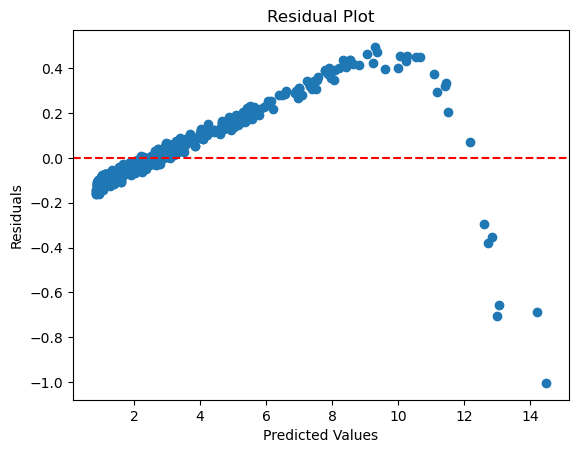

In [941]:
# Анализ остатков регрессии для проверки допущений модели
resid = y_pred - y_test 

plt.scatter(y_pred, resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Регрессия с регуляризацией:

In [942]:
# Подбор оптимального параметра регуляризации alpha для Lasso-регрессии

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV # Функция для подбора гиперпараметров

en = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        'alpha': np.linspace(0.000001, 10, 100)
    },
    cv=10 # Количество фолдов кросс-валидации
)

en.fit(X_train, y_train) # Обучение модели

en.best_params_ # Выврд подобранных параметров

{'alpha': 1e-06}

In [943]:
# Создание полиномиальных признаков 3-й степени для учета нелинейных зависимостей
from sklearn.preprocessing import PolynomialFeatures

poly_train = PolynomialFeatures(3, include_bias=False).fit(X_train)
poly_test = PolynomialFeatures(3, include_bias=False).fit(X_test)

X_train_poly = pd.DataFrame(
    poly_train.transform(X_train),
    index=X_train.index,
    columns=poly_train.get_feature_names_out()
)
X_test_poly = pd.DataFrame(
    poly_test.transform(X_test),
    index=X_test.index,
    columns=poly_test.get_feature_names_out()
)

In [944]:
X_train_poly.head()

,rank,name,age,country / territory,source,industry,rank^2,rank name,rank age,rank country / territory,...,country / territory^3,country / territory^2 source,country / territory^2 industry,country / territory source^2,country / territory source industry,country / territory industry^2,source^3,source^2 industry,source industry^2,industry^3
1937,0.594980,1.632562,1.047167,-0.411259,-1.578724,-1.305765,0.354002,0.971342,0.623044,-0.244691,...,-0.069558,-0.267016,-0.220849,-1.025008,-0.847786,-0.701205,-3.934761,-3.254447,-2.691759,-2.226358
2364,0.672660,1.635255,-0.389007,-1.191852,-0.906048,-1.305765,0.452471,1.099970,-0.261670,-0.801711,...,-1.693038,-1.287051,-1.854853,-0.978419,-1.410063,-2.032134,-0.743796,-1.071933,-1.544832,-2.226358
1780,0.543194,0.519138,-2.656651,1.149927,1.751639,1.647176,0.295060,0.281993,-1.443077,0.624633,...,1.520586,2.316249,2.178114,3.528252,3.317836,3.119968,5.374449,5.053930,4.752526,4.469097
2172,0.646767,-1.204177,0.064521,-0.762526,0.142170,-0.462068,0.418307,-0.778822,0.041730,-0.493176,...,-0.443367,0.082664,-0.268667,-0.015412,0.050092,-0.162804,0.002874,-0.009339,0.030354,-0.098654
2558,0.724446,-1.524606,-2.203122,-1.269911,-0.394320,1.647176,0.524823,-1.104495,-1.596044,-0.919982,...,-2.047952,-0.635909,2.656357,-0.197456,0.824824,-3.445507,-0.061312,0.256116,-1.069863,4.469097


In [946]:
# Обучение модели на полиномиальных признаках и оценка качества
mae = mean_absolute_error(y_test, y_pred_poly) 
r2 = r2_score(y_test, y_pred_poly)

print(mae, r2)

0.026926415143379505 0.9996606626147779


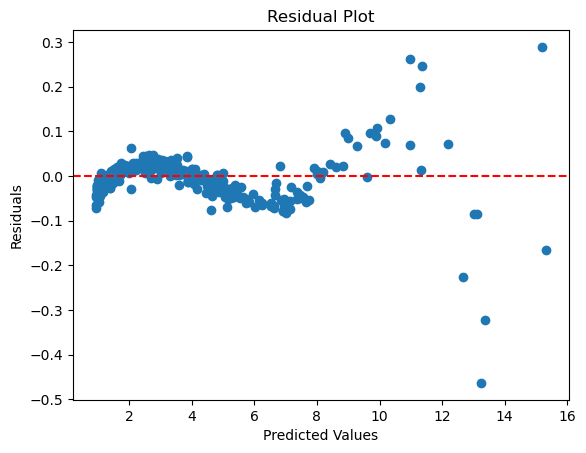

In [947]:
# Визуализация остатков полиномиальной регрессии
# Проверка гомоскедастичности и нормальности распределения ошибок
resid_poly = y_pred_poly - y_test 

plt.scatter(y_pred_poly, resid_poly)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

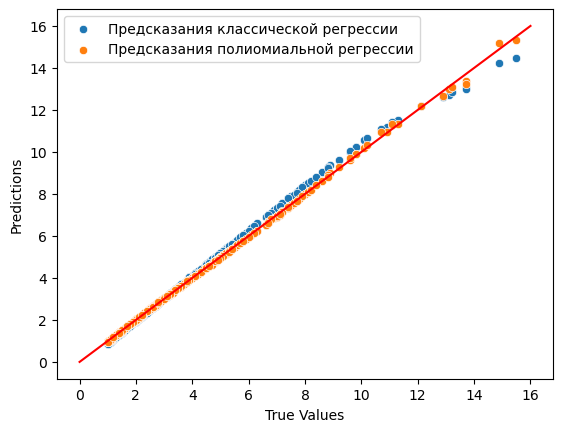

In [948]:
# Сравнение результатов обычной и полиномиальной регрессии
sns.scatterplot(x=y_test, y=y_pred, label='Предсказания классической регрессии')
sns.scatterplot(x=y_test, y=y_pred_poly, label='Предсказания полиомиальной регрессии')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 16], [0, 16], color='red')  # Диагональная линия

# Логистическая регрессия

Задача:
- Определить к индустрии "Finance & Investments" или "Manufacturing" относится бизнесмен

In [949]:
df_classification = df[
    (df['industry'] == 'Finance & Investments') \
          | (df['industry'] == 'Manufacturing')]

In [950]:
df_classification = df_classification.reset_index(drop=True) # Для удобства обновлю индексы

In [951]:
df_classification.head()

,rank,name,net_worth (in billion $),age,country / territory,source,industry
0,5,Warren Buffett,106.0,92.0,United States,Berkshire Hathaway,Finance & Investments
1,35,Ken Griffin,35.0,54.0,United States,Hedge funds,Finance & Investments
2,46,Reinhold Wuerth & family,29.7,87.0,Germany,Fasteners,Manufacturing
3,48,Jeff Yass,28.5,64.0,United States,"Trading, investments",Finance & Investments
4,49,Jim Simons,28.1,84.0,United States,Hedge funds,Finance & Investments


In [952]:
# Разделю предикторы и целевую переменную
y, X = df_classification['industry'], df_classification.drop('industry', axis=1)

# Кодирую категориальные признаки
cat_vars = set(X.columns) - set(['Age', 'net_worth (in billion $)'])
for var in cat_vars:
    X[var] = LabelEncoder().fit_transform(X[var])

# Стандартизация
X = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Удалю выбросы
X = X[(np.abs(X) < 3)].dropna()
y = y[X.index]

# Так как переменные ранга и дохода создают мультиколлинеарность, удалю одну из них:
X = X.drop('rank', axis=1)

# Разделю на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [953]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train) # Обучаю модель

y_pred = lr.predict(X_test) # Получаю предсказания

In [954]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[58, 17],
       [14, 45]], dtype=int64)

In [955]:
accuracy_score(y_test, y_pred)

0.7686567164179104

# Кластеризация

Формулировка задачи:
- Запланирован выпуск трёх журналов, посвящённых людям из списка Forbes. Нужно определить, контент про каких людей в какой журнал войдёт.

In [956]:
df_cluster = df.copy()

# Кодирую категориальные признаки
cat_vars = set(df_cluster.columns) - set(['Age', 'net_worth (in billion $)'])
for var in cat_vars:
    df_cluster[var] = LabelEncoder().fit_transform(df_cluster[var])

# Стандартизация
df_cluster = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster),
    columns=df_cluster.columns,
    index=df_cluster.index
)

In [957]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, n_init=100)

k_means.fit(df_cluster) # Обучаю модель

KMeans(n_clusters=3, n_init=100)

In [958]:
df = pd.concat(
    [df, pd.Series(k_means.labels_, index=df.index, name='clusters')], 
    axis=1
)

In [959]:
df['clusters'].value_counts()

1    1321
2    1128
0     126
Name: clusters, dtype: int64

<Axes: xlabel='net_worth (in billion $)', ylabel='age'>

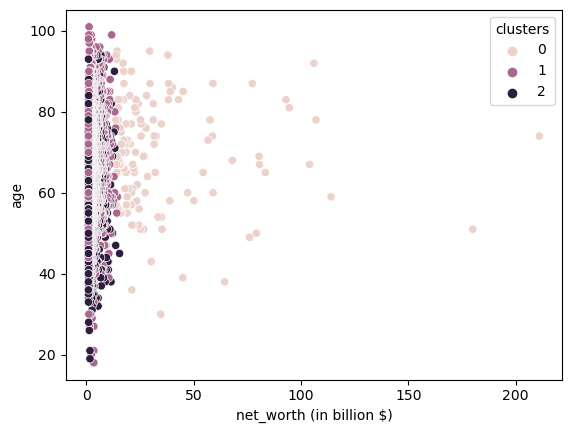

In [960]:
sns.scatterplot(data=df, x='net_worth (in billion $)', y='age', hue='clusters')

<Axes: xlabel='clusters', ylabel='proportion'>

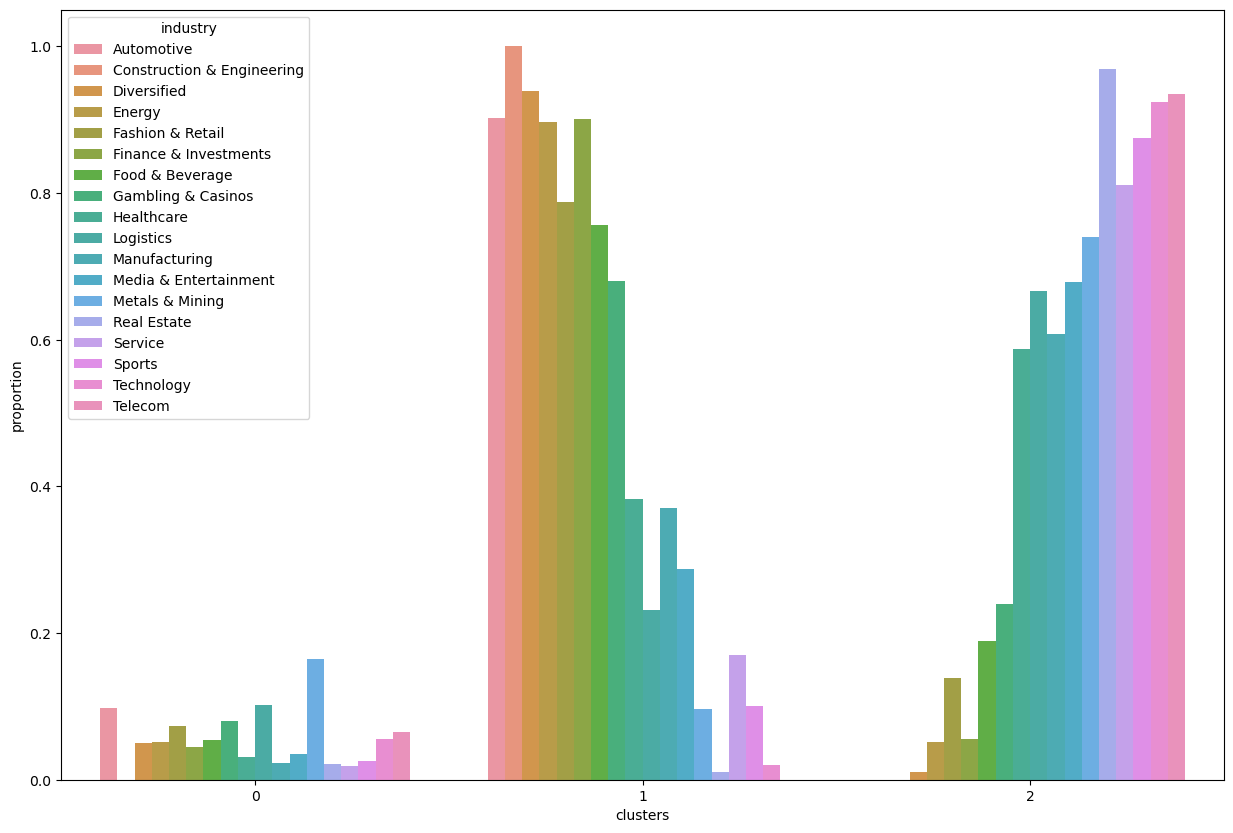

In [961]:
df_industry_group = df.groupby('industry', as_index=False)['clusters'].\
    value_counts(normalize=True).\
    sort_values(by='industry')

plt.figure(figsize=(15, 10))
sns.barplot(data=df_industry_group, x='clusters', y='proportion', hue='industry')